In [1]:
import torch

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
print(device)

cuda


In [4]:
import pandas as pd

In [ ]:
!wget https://www.dropbox.com/scl/fo/vlylepcshq46ytwfdy9bq/AEykvkXwsYY_L4HrdLwFMkU?rlkey=n4s44wyj8wal5inty51vfu1zr&st=9vl2ntfi&dl=0 data/

--2024-04-29 16:50:45--  https://www.dropbox.com/scl/fo/vlylepcshq46ytwfdy9bq/AEykvkXwsYY_L4HrdLwFMkU?rlkey=n4s44wyj8wal5inty51vfu1zr
Resolving www.dropbox.com (www.dropbox.com)... /bin/bash: line 1: data/: No such file or directory
162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1f136b276f375b3a5349a348ab.dl.dropboxusercontent.com/zip_download_get/B1VzkIl0DBXEvgFB3L6S_k83OCEEseHJPu3c10M17Ewvl5sPcwkK2lzNSO-F4QedXCteIaxcNNhYFrtyIBwv4wZek-0oPUjLGQcwXYeQn6T2rA# [following]
--2024-04-29 16:50:46--  https://uc1f136b276f375b3a5349a348ab.dl.dropboxusercontent.com/zip_download_get/B1VzkIl0DBXEvgFB3L6S_k83OCEEseHJPu3c10M17Ewvl5sPcwkK2lzNSO-F4QedXCteIaxcNNhYFrtyIBwv4wZek-0oPUjLGQcwXYeQn6T2rA
Resolving uc1f136b276f375b3a5349a348ab.dl.dropboxusercontent.com (uc1f136b276f375b3a5349a348ab.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f


In [ ]:
!unzip AEykvkXwsYY_L4HrdLwFMkU?rlkey=n4s44wyj8wal5inty51vfu1zr&st=9vl2ntfi&dl=0 data/

/bin/bash: line 1: data/: No such file or directory
Archive:  AEykvkXwsYY_L4HrdLwFMkU?rlkey=n4s44wyj8wal5inty51vfu1zr
mapname:  conversion of  failed
   creating: combined/
   creating: datasets/
   creating: embeddings/
 extracting: build_data.py           
 extracting: build_datasets.py       
 extracting: datasets/Wu_test.pt     
 extracting: combined/Wu_test.csv    
 extracting: datasets/Wu_train.pt    
 extracting: combined/Wu_train.csv   
 extracting: datasets/Chen_test.pt   
 extracting: combined/Chen_test.csv  
 extracting: datasets/Chen_train.pt  
 extracting: datasets/Olson_test.pt  
 extracting: datasets/Sinai_test.pt  
 extracting: combined/Olson_test.csv  
 extracting: combined/Sinai_test.csv  
 extracting: combined/Chen_train.csv  
 extracting: datasets/Olson_train.pt  
 extracting: datasets/Sinai_train.pt  
 extracting: combined/Sinai_train.csv  
 extracting: combined/Olson_train.csv  
 extracting: embeddings/Wu_test_seq.pt  
 extracting: datasets/Pokusaeva_test.pt  
 ex

In [45]:
emb = torch.load('data/embeddings/Tsuboyama_test_seq.pt', map_location=device)
y = pd.read_csv('data/combined/Tsuboyama_test.csv')['DMS_score']
df = pd.DataFrame(emb.cpu().numpy())
df['y'] = y

In [46]:
df['y']

0        0.223195
1       -1.500186
2       -0.944639
3       -0.241966
4       -0.293641
           ...   
25082   -0.502718
25083    0.236532
25084   -0.803547
25085   -2.435472
25086   -0.030397
Name: y, Length: 25087, dtype: float64

In [47]:
df['y'].value_counts()

y
 0.223195    1
-3.801661    1
-1.044932    1
-1.441870    1
-0.270375    1
            ..
-3.348938    1
-0.632775    1
-0.920019    1
-1.580203    1
-0.030397    1
Name: count, Length: 25087, dtype: int64

In [48]:
import matplotlib.pyplot as plt

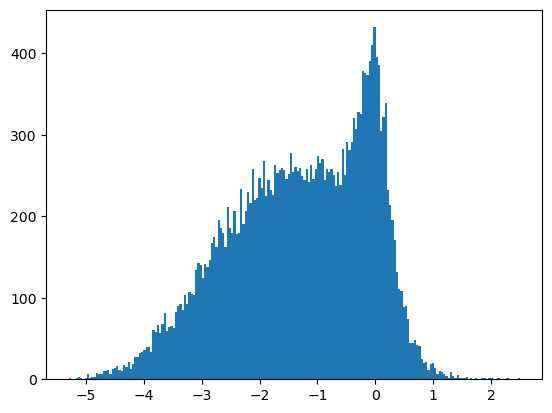

In [49]:
plt.hist(y, bins=200)
plt.show()

In [42]:
import sklearn

import numpy as np
from sklearn.linear_model import LinearRegression

print(np.array(y).shape)

(107393,)


In [50]:
import smogn

for col in df.columns:
    df[col] = df[col].astype(float)
    df[col] = (df[col] - df[col].mean()) / df[col].std()
                                     

In [ ]:
def smoterify(name): 
    emb = torch.load(f'data/embeddings/{name}_seq.pt', map_location=device)
    y = pd.read_csv(f'data/combined/{name}.csv')['DMS_score']
    df = pd.DataFrame(emb.cpu().numpy())
    df['y'] = y

    #norm first
    for col in df.columns:
        df[col] = df[col].astype(float)
        df[col] = (df[col] - df[col].mean()) / df[col].std()
    
    result = smogn.smoter(df, 'y')
    return result


In [53]:
smogn.smoter(df, 'y')

dist_matrix:  10%|#         | 212/2091 [07:23<1:05:27,  2.09s/it]


KeyboardInterrupt: 

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X.cpu().numpy(), np.array(y))

LinearRegression()

In [16]:
test_X = torch.load('data/embeddings/Olson_test_seq.pt', map_location=device)
test_y = pd.read_csv('data/combined/Olson_test.csv')['DMS_score']
predictions = lin_reg.predict(test_X.cpu().numpy())

In [17]:
from scipy.stats import spearmanr

coef, p = spearmanr(np.array(test_y), predictions)
print(coef)

0.8761505019063874


In [18]:
def minmax(x):
    return ( (x - np.min(x)) / (np.max(x) - np.min(x)) )

def calc_ndcg(y_true, y_score, **kwargs):
    '''
    Inputs:
        y_true: an array of the true scores where higher score is better
        y_score: an array of the predicted scores where higher score is better
    Options:
        quantile: If True, uses the top k quantile of the distribution
        top: under the quantile setting this is the top quantile to
            keep in the gains calc. This is a PERCENTAGE (i.e input 10 for top 10%)
    Notes:
        Currently we're calculating NDCG on the continuous value of the DMS
        I tried it on the binary value as well and the metrics seemed mostly
        the same.
    '''
    if 'quantile' not in kwargs:
        kwargs['quantile'] = True
    if 'top' not in kwargs:
        kwargs['top'] = 10
    if kwargs['quantile']:
        k = np.floor(y_true.shape[0]*(kwargs['top']/100)).astype(int)
    else:
        k = kwargs['top']
    if isinstance(y_true, pd.Series):
        y_true = y_true.values
    if isinstance(y_score, pd.Series):
        y_score = y_score.values
    gains = minmax(y_true)
    ranks = np.argsort(np.argsort(-y_score)) + 1

    if k == 'all':
        k = len(ranks)
    #sub to top k
    ranks_k = ranks[ranks <= k]
    gains_k = gains[ranks <= k]
    #all terms with a gain of 0 go to 0
    ranks_fil = ranks_k[gains_k != 0]
    gains_fil = gains_k[gains_k != 0]

    #if none of the ranks made it return 0
    if len(ranks_fil) == 0:
        return (0)

    #discounted cumulative gains
    dcg = np.sum([g/np.log2(r+1) for r,g in zip(ranks_fil, gains_fil)])

    #ideal dcg - calculated based on the top k actual gains
    ideal_ranks = np.argsort(np.argsort(-gains)) + 1
    ideal_ranks_k = ideal_ranks[ideal_ranks <= k]
    ideal_gains_k = gains[ideal_ranks <= k]
    ideal_ranks_fil = ideal_ranks_k[ideal_gains_k != 0]
    ideal_gains_fil = ideal_gains_k[ideal_gains_k != 0]
    idcg = np.sum([g/np.log2(r+1) for r,g in zip(ideal_ranks_fil, ideal_gains_fil)])

    #normalize
    ndcg = dcg/idcg

    return (ndcg)
def calc_toprecall(true_scores, model_scores, top_true=10, top_model=10):
    top_true = (true_scores >= np.percentile(true_scores, 100-top_true))
    top_model = (model_scores >= np.percentile(model_scores, 100-top_model))

    TP = (top_true) & (top_model)
    recall = TP.sum() / (top_true.sum())

    return (recall)

In [19]:
print(calc_ndcg(test_y, predictions))
print(calc_toprecall(test_y, predictions))

0.9274056625828503
0.5106145251396648


In [ ]:
print(test_y.shape)
print(predictions.shape)

errors = np.abs(test_y- predictions)

(107393,)
(107393,)


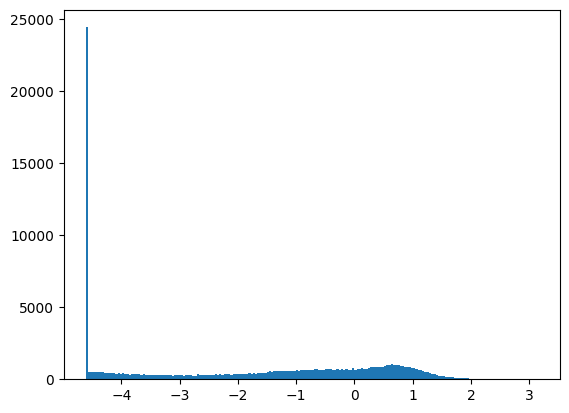

In [ ]:
vals, bins, _ = plt.hist(test_y, bins=200)
plt.show()

(200,)
(201,)


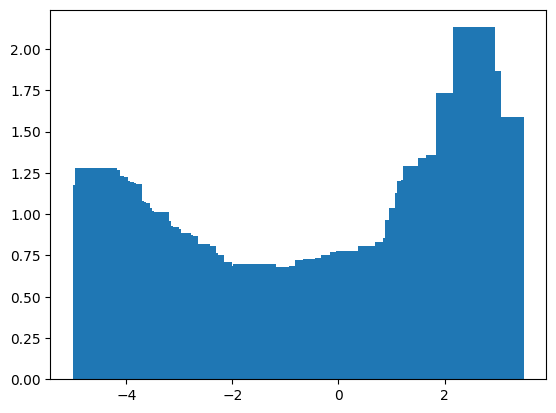

In [ ]:
# prompt: find the average value of errors in the bins found in the previous cell and plot a bar plot showing the values

bins_mean = []
bins_vals = []
for i in range(len(bins)-1):
    vals_in_bin = test_y[(test_y >= bins[i]) & (test_y < bins[i+1])]
    errors_in_bin = errors[(test_y >= bins[i]) & (test_y < bins[i+1])]
    if len(errors_in_bin) > 0:
        bins_mean.append(np.mean(errors_in_bin))
        bins_vals.append(len(vals_in_bin))
    else:
        bins_mean.append(0)
        bins_vals.append(0)

print(np.array(bins_mean).shape)
print(bins.shape)
plt.bar(bins[:200], bins_mean)
plt.show()


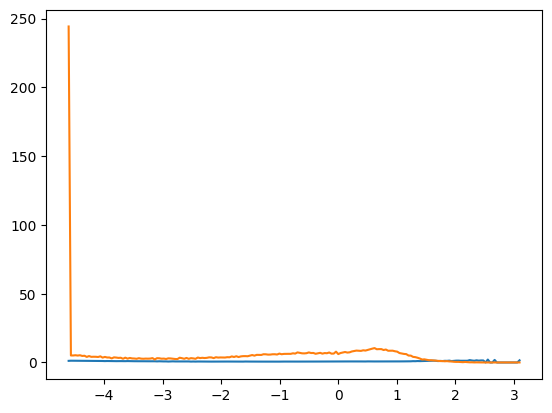

In [ ]:
from scipy.stats import pearsonr

plt.plot(bins[:200], np.array(bins_mean))
plt.plot(bins[:200], vals / 100)
plt.show()

In [ ]:
from scipy.stats import binned_statistic

avg_errors = binned_statistic(test_y, errors, statistic='mean', bins=bins)

In [ ]:
changed_errors = np.nan_to_num(avg_errors.statistic, nan=0.0)

print(np.corrcoef(vals, changed_errors))

[[1.        0.0472589]
 [0.0472589 1.       ]]


In [ ]:
from sklearn.neighbors import KernelDensity

kd = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(y)[:, np.newaxis])
kd_vals_left = np.exp(kd.score_samples(bins[:-1, np.newaxis]))
kd_vals_right = np.exp(kd.score_samples(bins[1:, np.newaxis]))
pdf = kd_vals_right + kd_vals_left / 2.0 * len(test_y)
print(pdf)

[5.09757442e+04 4.85254516e+04 4.04570383e+04 3.00035804e+04
 2.04094238e+04 1.34612828e+04 9.31252299e+03 7.20481220e+03
 6.25267345e+03 5.83326289e+03 5.61944958e+03 5.47355159e+03
 5.34800522e+03 5.23026256e+03 5.11896733e+03 5.01463538e+03
 4.91656144e+03 4.82272972e+03 4.73080410e+03 4.63899783e+03
 4.54660265e+03 4.45433456e+03 4.36431255e+03 4.27932674e+03
 4.20151179e+03 4.13110689e+03 4.06608738e+03 4.00301492e+03
 3.93871856e+03 3.87185500e+03 3.80348472e+03 3.73651133e+03
 3.67453862e+03 3.62084237e+03 3.57778005e+03 3.54654096e+03
 3.52702449e+03 3.51780681e+03 3.51638073e+03 3.51988018e+03
 3.52619985e+03 3.53496174e+03 3.54761949e+03 3.56642394e+03
 3.59274554e+03 3.62576301e+03 3.66237095e+03 3.69844309e+03
 3.73082915e+03 3.75907498e+03 3.78585958e+03 3.81559953e+03
 3.85178252e+03 3.89478463e+03 3.94181184e+03 3.98890943e+03
 4.03342953e+03 4.07543924e+03 4.11762718e+03 4.16398163e+03
 4.21783002e+03 4.28021456e+03 4.34959898e+03 4.42304142e+03
 4.49790410e+03 4.572974

In [ ]:
print(np.corrcoef(pdf, changed_errors))

[[1.         0.07466184]
 [0.07466184 1.        ]]


In [ ]:
import multiprocessing
from tqdm import tqdm

def parallel_score_samples(kde, samples, thread_count=int(0.875 * multiprocessing.cpu_count())):
    with multiprocessing.Pool(thread_count) as p:
        return np.concatenate(p.map(kde.score_samples, np.array_split(samples, thread_count)))

[-4.60517019e+00 -4.56646686e+00 -4.52776354e+00 -4.48906022e+00
 -4.45035690e+00 -4.41165358e+00 -4.37295025e+00 -4.33424693e+00
 -4.29554361e+00 -4.25684029e+00 -4.21813697e+00 -4.17943364e+00
 -4.14073032e+00 -4.10202700e+00 -4.06332368e+00 -4.02462036e+00
 -3.98591703e+00 -3.94721371e+00 -3.90851039e+00 -3.86980707e+00
 -3.83110375e+00 -3.79240042e+00 -3.75369710e+00 -3.71499378e+00
 -3.67629046e+00 -3.63758714e+00 -3.59888381e+00 -3.56018049e+00
 -3.52147717e+00 -3.48277385e+00 -3.44407053e+00 -3.40536720e+00
 -3.36666388e+00 -3.32796056e+00 -3.28925724e+00 -3.25055392e+00
 -3.21185059e+00 -3.17314727e+00 -3.13444395e+00 -3.09574063e+00
 -3.05703731e+00 -3.01833398e+00 -2.97963066e+00 -2.94092734e+00
 -2.90222402e+00 -2.86352070e+00 -2.82481737e+00 -2.78611405e+00
 -2.74741073e+00 -2.70870741e+00 -2.67000409e+00 -2.63130076e+00
 -2.59259744e+00 -2.55389412e+00 -2.51519080e+00 -2.47648748e+00
 -2.43778415e+00 -2.39908083e+00 -2.36037751e+00 -2.32167419e+00
 -2.28297087e+00 -2.24426

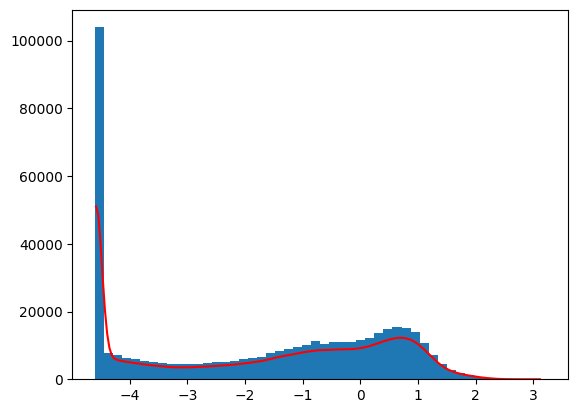

In [ ]:
plt.hist(y, bins=50)
print(bins)
pdf_vals = np.exp(kd.score_samples(bins[:, np.newaxis]))
print((bins[1:] + bins[:-1]) / 2.0)
plt.plot((bins[1:] + bins[:-1]) / 2.0, pdf, c='r')
plt.show()

In [ ]:
kd_vals = np.exp(parallel_score_samples(kd, predictions[:, np.newaxis]))

plt.scatter(predictions, kd_vals, color='b')
plt.hist(predictions, bins=30)

sample_weights = np.power(1.0 / kd_vals, 1.0)
print(sample_weights)
#plt.scatter(y, sample_weights, color='b')

from scipy import stats
print(stats.describe(sample_weights))
plt.scatter(predictions, sample_weights, color='r')


#plt.scatter(predictions, sample_weights, color='b')

In [ ]:
lin_reg.fit(test_X, test_y, sample_weight=sample_weights)

LinearRegression()

In [ ]:
kernel_smoothed_preds = lin_reg.predict(test_X)

In [ ]:
from scipy.stats import spearmanr

coef, p = spearmanr(kernel_smoothed_preds, test_y)
print(coef)

0.8943605985133756


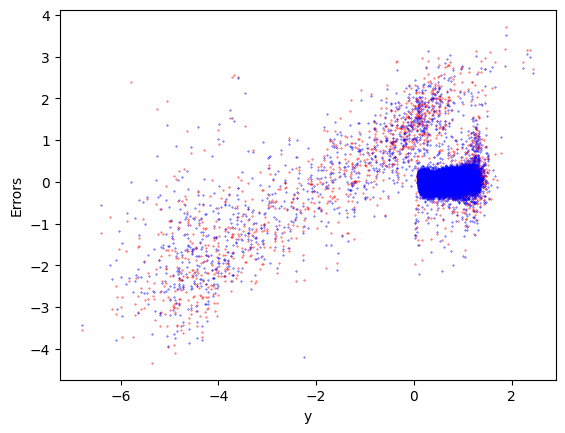

In [ ]:
k_errors = test_y - kernel_smoothed_preds
errors = test_y - predictions
plt.scatter(test_y, errors, c='r', s=0.1)
plt.scatter(test_y, k_errors, c='b', s=0.1)

plt.xlabel('y')
plt.ylabel('Errors')
plt.show()

In [ ]:
print(calc_ndcg(test_y, predictions))
print(calc_toprecall(test_y, predictions))

0.9897389921854038
0.6682121124311794
